# Problem 2 - Answers

To start off, we import our packages and set the constants and arrays we will be using during the question.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# constants
m = 1
g = 9.8
l = 1
k = 1
wp = np.sqrt(g/l)
ws = np.sqrt(k/m)
end = np.pi*13
start = 0
N = 1000
h = (end - start)/N
t = np.arange(start,end,h)

Now we define our function, as in the solution to question 1. For this we have a four element vector, the first two elements of which are $x_1$ and $v_1$, and the next two are $x_2$ and $v_2$. According to lecture notes 7:

$$ \frac{dv_1}{dt} = -\omega_p^2x_1 + \omega_s^2(x_2 - x_1) $$

and

$$ \frac{dv_2}{dt} = -\omega_p^2x_2 - \omega_s^2(x_2 - x_1). $$

In addition, $\frac{dx_i}{dt} = v_i$ still holds true, so putting this into our function gives:

In [3]:
def f(r,t):
    x1 = r[0]
    v1 = r[1]
    x2 = r[2]
    v2 = r[3]
    fv1 = -(wp**2)*x1 + (ws**2)*(x2 - x1)
    fx1 = v1
    fv2 = -(wp**2)*x2 - (ws**2)*(x2 - x1)
    fx2 = v2
    return np.array([fx1,fv1,fx2,fv2])

Rewriting the Runge-Kutta solver from question 1 to fit a four element vector gives us:

In [4]:
def rungekutta(r,t):
    x1points = []
    v1points = []
    x2points = []
    v2points = []
    for i in t:
        x1points.append(r[0])
        v1points.append(r[1])
        x2points.append(r[2])
        v2points.append(r[3])
        k1 = h * f(r, i)
        k2 = h * f(r + 0.5 * k1, i + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, i + 0.5 * h)
        k4 = h * f(r + k3, i + h)
        r = r + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return np.array([x1points,v1points,x2points,v2points])

In [5]:
# put the initial values into the equation and solve
r = np.array([0.01,0,0,0])
rsol = rungekutta(r,t)

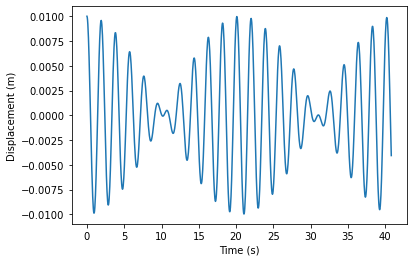

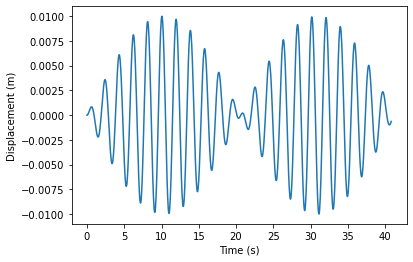

In [6]:
# plot x1 and x2 vs time
plt.figure()
plt.plot(t,rsol[0])
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.figure()
plt.plot(t,rsol[2])
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.show()


In order to extend this to an arbitrary number of pendula, we have to first figure out the equations of motion of each member of the chain. The two end pendula are given above, and by extending the force diagram in lecture notes 7 to have two springs, one either side of the mass, one can arrive at the equation of motion for each middle pendulum $i$:

$$ \frac{dv_i}{dt} = -\omega_p^2x_i - \omega_s^2(x_{i+1} - 2x_i + x_{i-1}),$$

where $i+1$ is the mass immediately to the right, and $i-1$ is the mass immediately to the left.

To extend our function to cope with an indeterminate number of pendula, we must first enable it to work this out from the input (half the length of r, as r has both position and velocity for each pendulum), and then we must loop over each pendulum, determine if it is an edge or a middle pendulum, and then apply the appropriate equations of motion.

In [7]:
def f(r,t):
    n = len(r)/2
    flist = []
    for i in np.arange(n):
        if i == 0:
            flist.append(r[int(2*i+1)])
            flist.append(-(wp**2)*r[int(2*i)] + (ws**2)*(r[int(2*i+2)] - r[int(2*i)]))
        elif i < n-1:
            flist.append(r[int(2*i+1)])
            flist.append(-(wp**2)*r[int(2*i)] + (ws**2)*(r[int(2*i+2)] - 2*r[int(2*i)] + r[int(2*i-2)]))
        elif i == n-1:
            flist.append(r[int(2*i+1)])
            flist.append(-(wp**2)*r[int(2*i)] - (ws**2)*(r[int(2*i)] - r[int(2*i-2)]))
    return np.array(flist)

Similarly for the Runge-Kutta solver, we first create an empty list for each unknown in the vector $\mathbf{r}$, and then append the value of that unknown at each timestep, ending up with a vector of solution vectors in time.

In [8]:
def rungekutta(r,t):
    solution = [[] for n in r]
    for i in t:
        for idx,lst in enumerate(solution):
            lst.append(r[idx])
        k1 = h * f(r, i)
        k2 = h * f(r + 0.5 * k1, i + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, i + 0.5 * h)
        k4 = h * f(r + k3, i + h)
        r = r + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return np.array(solution)

Solve for 3 pendula

In [9]:
r = np.array([0.01,0,0,0,0,0])
rsol = rungekutta(r,t)

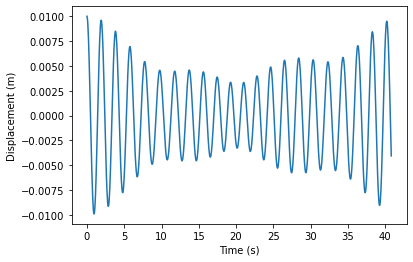

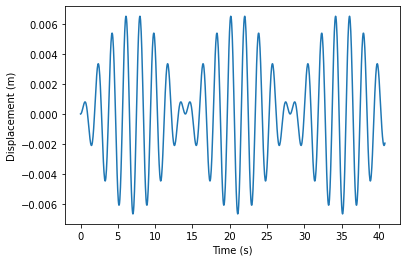

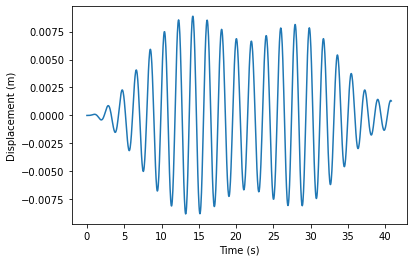

In [10]:
for i in np.arange(len(r)/2):
    plt.figure()
    plt.plot(t,rsol[int(2*i)])
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
plt.show()

No modifications to the code, solve for 4 pendula

In [11]:
r = np.array([0.01,0,0,0,0,0,0,0])
rsol = rungekutta(r,t)

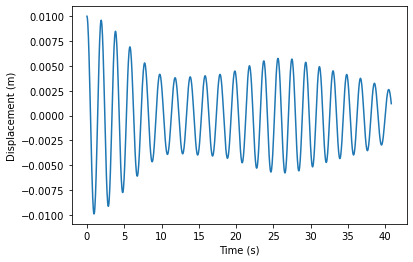

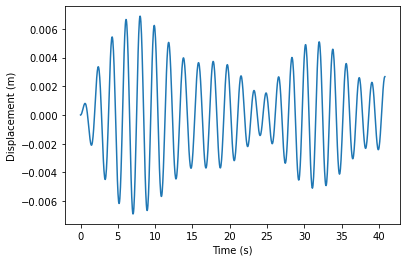

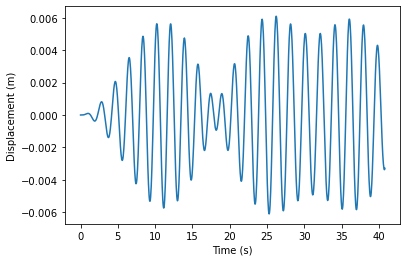

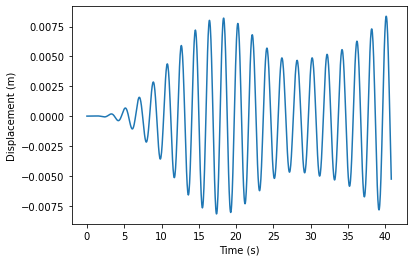

In [12]:
for i in np.arange(len(r)/2):
    plt.figure()
    plt.plot(t,rsol[int(2*i)])
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
plt.show()